In [ ]:

# google drive 연동
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Kospi 데이터 불러오기**

In [ ]:
# 필요한 라이브러리를 import 하는 과정입니다(pandas와 numpy 입니다)
import pandas as pd
import numpy as np

# '김준희님/1. data_2431_20220417(코스피).csv' 경로에 있는 1. data_2431_20220417(코스피).csv 파일을 불러와서 kospi라는 이름으로 저장하는 과정입니다. 인코딩 문제로 encoding='cp949' 옵션을 주었습니다.
kospi=pd.read_csv('김준희님/1. data_2431_20220417(코스피).csv',encoding='cp949')


#kosdaq=pd.read_csv('김준희님/2. data_4233_20220417(코스닥).csv',encoding='cp949')
#dowjones=pd.read_csv('김준희님/3. Macrotrends-dow-jones-industrial-average-daily.csv',encoding='cp949')
#sp500=pd.read_csv('김준희님/4. Macrotrends-s-p-500-index-daily.csv',encoding='cp949')
#nasdaq=pd.read_csv('김준희님/5. NASDAQCOM.csv',encoding='cp949')
#nikkei=pd.read_csv('김준희님/6. nikkei-225-index-historical-chart-data.csv',encoding='cp949')

# **Kospi 종가를 통한 기준/전환/스팬 등 생성 이후 52일치 image 및 26일 후 하락/상승 Label 생성하여 파일로 저장**

In [ ]:
# 불러온 kospi 데이터의 '일자', '종가' 컬럼만 추출합니다
kospi = kospi[['일자','종가']]

# '일자'컬럼은 '%Y-%m-%d' 형식의 date 타입으로 바꿔줍니다
kospi['일자'] = pd.to_datetime(kospi['일자'], format='%Y-%m-%d')

# kospi 데이터를 '일자'컬럼 기준으로 오름차순 정렬합니다. 
kospi = kospi.sort_values(['일자']).reset_index(drop=True)
print("kospi 원본 데이터")
print(kospi.head(8),"\n")

# 총 51번 반복하는 반복문을 만듭니다.
for i in range(1,52):
    # kospi 데이터를 한줄씩 밀리는 형태로 만든 후, 병합(일자와 종가 포함 총 53개 컬럼 존재)
    kospi = pd.concat([kospi,kospi.iloc[:,-1].shift(1)],axis=1)

# 각 지표를 계산하는 과정입니다.
kospi['52일최고치'] = kospi.iloc[:,1:].apply(lambda x : max(x), axis=1)
kospi['52일최저치'] = kospi.iloc[:,1:].apply(lambda x : min(x), axis=1)
kospi['26일최고치'] = kospi.iloc[:,1:27].apply(lambda x : max(x), axis=1)
kospi['26일최저치'] = kospi.iloc[:,1:27].apply(lambda x : min(x), axis=1)
kospi['9일최고치'] = kospi.iloc[:,1:10].apply(lambda x : max(x), axis=1)
kospi['9일최저치'] = kospi.iloc[:,1:10].apply(lambda x : min(x), axis=1)
kospi['기준선'] = ((kospi['26일최고치'] + kospi['26일최저치']) * 0.5)[25:]
kospi['전환선'] = ((kospi['9일최고치'] + kospi['9일최저치']) * 0.5)[8:]
kospi['선행스팬1'] = ((kospi['기준선'] + kospi['전환선'])*0.5).shift(25)
kospi['선행스팬2'] = ((kospi['52일최고치'] + kospi['52일최저치'])*0.5).shift(76)
kospi = pd.concat([kospi.iloc[:,:2], kospi.iloc[:,-10:]],axis=1)
kospi['후행스팬'] = kospi['종가'].shift(-25)

# '일자', '종가', 계산된 지표들만 컬럼으로 추출합니다.
kospi = kospi[['일자','종가','기준선','전환선','선행스팬1','선행스팬2','후행스팬']]

print("지표 생성 후 데이터 : 이미지 저장 시, 메모리 문제로 인해 2000/03/02부터 시작하도록 필터링하여 저장합니다.")
kospi = kospi[1510:].reset_index(drop=True).copy()
kospi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


kospi 원본 데이터
          일자      종가
0 2000-03-02  894.66
1 2000-03-03  894.83
2 2000-03-06  909.33
3 2000-03-07  907.34
4 2000-03-08  915.94
5 2000-03-09  884.59
6 2000-03-10  891.36
7 2000-03-13  854.66 

0        894.66
1        894.83
2        909.33
3        909.33
4        915.94
         ...   
5457    2834.29
5458    2792.00
5459    2771.93
5460    2771.93
5461    2771.93
Name: 52일최고치, Length: 5462, dtype: float64
지표 생성 후 데이터 : 이미지 저장 시, 메모리 문제로 인해 2000/03/02부터 시작


,일자,종가,기준선,전환선,선행스팬1,선행스팬2,후행스팬
0,2006-04-18,1427.00,1371.275,1408.155,1339.4075,1257.135,1295.76
1,2006-04-19,1437.84,1373.835,1410.715,1333.6725,1260.045,1322.43
2,2006-04-20,1434.15,1373.835,1410.715,1333.6725,1264.995,1329.22
3,2006-04-21,1451.31,1380.570,1417.450,1332.7625,1267.795,1317.70
4,2006-04-24,1430.94,1380.570,1417.450,1334.1550,1271.415,1295.09
...,...,...,...,...,...,...,...
3947,2022-04-11,2693.10,2690.365,2726.150,2700.5925,2944.045,NaN
3948,2022-04-12,2666.76,2690.365,2712.980,2695.5750,2944.045,NaN
3949,2022-04-13,2716.49,2690.365,2712.980,2688.9750,2944.045,NaN
3950,2022-04-14,2716.71,2690.365,2712.980,2688.9750,2944.045,NaN


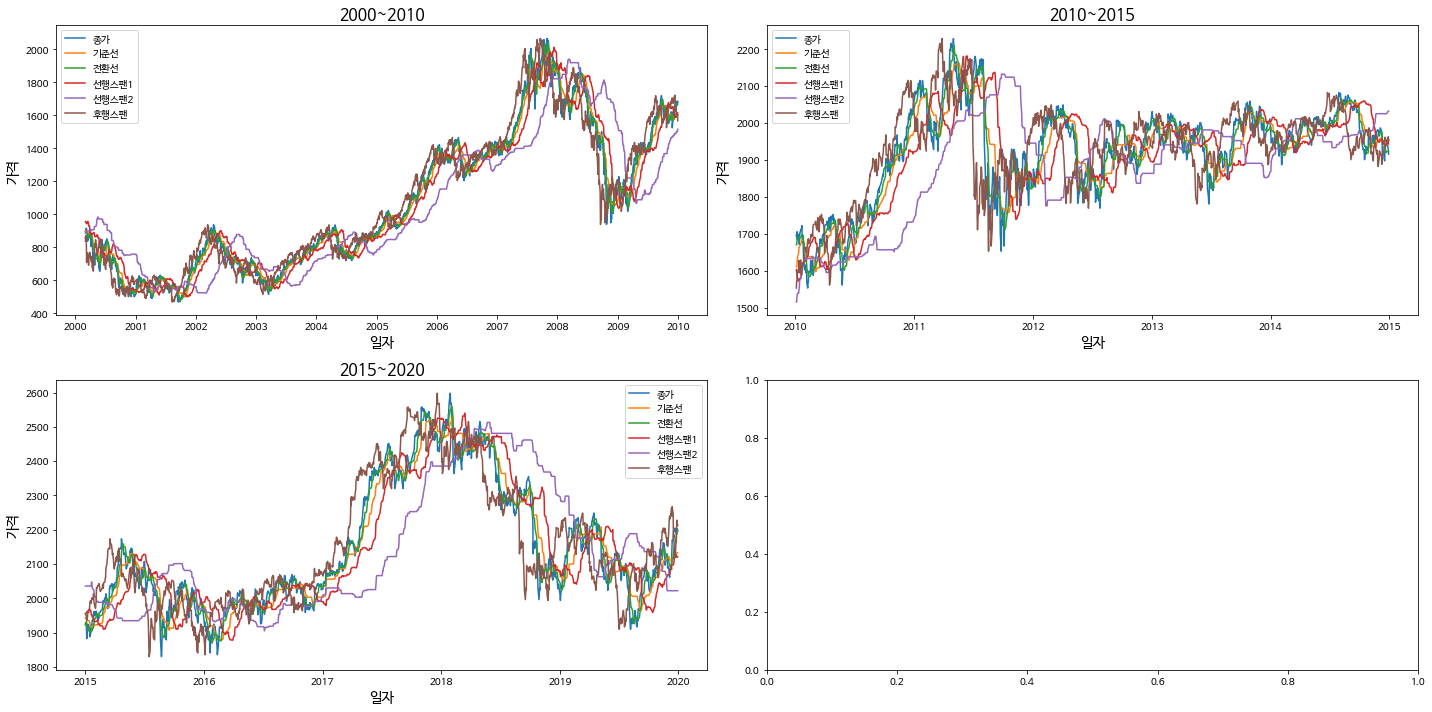

In [ ]:
# 그래프 작성을 위한 라이브러리를 import 합니다
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import dates
import seaborn as sns

# 한글 깨짐 문제로 인해 폰트 설정을 합니다.
plt.rc('font', family='NanumBarunGothic')

# 년도 구간 별 분포 파악을 위해 10년단위 세트로 저장합니다.
time_steps = [['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

# 총 2 by 2(4개) 의 subplot을 생성하도록 합니다(사이즈는 20 by 10 inches 입니다.)
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(20, 10)

# 총 3번 반복하는 반복문입니다.(그래프는 3개를 그릴 것 입니다.)
for i in range(3):

    # ax는 subplot 하나의 위치입니다([0,0],[0,1],[1,0] 이렇게 3가지가 나올 것 입니다.)
    ax = axes[i//2, i%2]

    # 위에서 정한 10년단위 기간으로 데이터를 필터링 합니다
    df = kospi.loc[(kospi['일자'] > time_steps[i][0]) & (kospi['일자'] < time_steps[i][1])]

    # x축을 일자, y축을 각 지표로 하는 선그래프를 생성합니다
    sns.lineplot(y=df['종가'], x=df['일자'], ax=ax)
    sns.lineplot(y=df['기준선'], x=df['일자'], ax=ax)
    sns.lineplot(y=df['전환선'], x=df['일자'], ax=ax)
    sns.lineplot(y=df['선행스팬1'], x=df['일자'], ax=ax)
    sns.lineplot(y=df['선행스팬2'], x=df['일자'], ax=ax)
    sns.lineplot(y=df['후행스팬'], x=df['일자'], ax=ax)

    # 그래프의 제목을 작성합니다.
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}',fontsize = 16)

    # x,y축 label 명을 정합니다.
    ax.set_xlabel('일자',fontsize = 14)
    ax.set_ylabel('가격',fontsize = 14)

    # 범례를 작성합니다. 
    ax.legend(['종가','기준선','전환선','선행스팬1','선행스팬2','후행스팬'],fontsize=10)

# 그래프를 출력하도록 해줍니다.
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
# data sequence 계산 및 이미지화를 하는 곳으로 현재 이미 이미지를 만들어놓은 상태에서는 실행할 필요 없습니다.

# 현재일 포함 과거 52일, 미래 26일로 세팅합니다.
past_date = 52
future_date = 26
y_data = []

# 이미지 명에 숫자를 카운트하여 넣을 수 있게 num=0을 정했습니다.
num = 0

# 전체기간 - 51(현재일 제외) - 25(현재일 제외) 만큼 반복하도록 합니다.
for i in  range(len(kospi)-(past_date-1)-(future_date-1)):

    # 52일씩 필터링하여 x_data에 저장합니다.
    x_data = kospi.iloc[i:past_date+i]

    # 처리를 쉽게 하기 위하여 정사각형 형태로 생성하였으며, 메모리 한계 때문에 작은 사이즈의 이미지로 생성하였습니다.
    # 1 by 1 inches 사이즈로 생성합니다.
    plt.figure(figsize=(1,1)) 

    # 각 지표를 선그래프로 작성합니다.
    ax = sns.lineplot(data = x_data, x = x_data.index, y = '종가')
    ax1 = sns.lineplot(data = x_data, x = x_data.index, y = '기준선')
    ax2 = sns.lineplot(data = x_data, x = x_data.index, y = '전환선')
    ax3 = sns.lineplot(data = x_data, x = x_data.index, y = '선행스팬1')
    ax4 = sns.lineplot(data = x_data, x = x_data.index, y = '선행스팬2')
    ax5 = sns.lineplot(data = x_data, x = x_data.index, y = '후행스팬')

    # x,y축의 모든 label및 눈금을 지웁니다(깔끔하게 그래프만 나오도록 하기 위함입니다.)
    ax.set_ylabel("")
    ax.set(yticklabels=[])  # remove the y-axis label
    ax.tick_params(left=False)
    ax.set(xticklabels=[])  # remove the y-axis label
    ax.tick_params(bottom=False)
    
    # 이미지 파일 명에 숫자를 카운트하여 넣기 위해 num에 누적해서 1을 더해줍니다.
    num+=1

    # save_path라는 곳에 '저장할 폴더/이미지 명.png' 경로를 지정합니다
    save_path = f'kospi_img/{num}.png'

    # 이미지를 저장하고 닫습니다.
    plt.savefig(save_path)
    plt.close()

    # 현재일대비 현재일 포함 26일 뒤 종가의 상승 및 하락 여부를 판단하여 y_data를 만들어줍니다.
    if kospi['종가'][past_date+i] > kospi['종가'][(past_date-1)+(future_date-1)+i] : 
        y_data.append(['하락'])
    else:
        y_data.append(['상승'])

# y_data를 pickle 파일로 외부에 저장합니다(pickle파일은 어떤 형태도 저장이 가능하며 언제든 불러올 수 있습니다.)
import pickle
with open('kospi_label/y.pkl', 'wb') as f:
    pickle.dump(y_data, f)

# **딥러닝 학습을 위한 library import**

In [ ]:
# 딥러닝 및 이미지 처리를 위한 필요 라이브러리를 import 합니다.
import cv2
import natsort
from skimage.io import imread
from sklearn.model_selection import train_test_split
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping,ModelCheckpoint


# **외부에 저장한 image 및 label을 통해 indexing 데이터 생성**

In [ ]:
# 이미지가 저장된 경로와, y_data(label)이 저장된 경로를 각각 저장합니다.
kospi_img_path = '김준희님/kospi_img' 
kospi_label_path = '김준희님/kospi_label'

# pickle 파일로 저장한 y_data(label)을 불러옵니다.
import pickle
with open('김준희님/kospi_label/y.pkl', 'rb') as f:
    y_data = pickle.load(f)

# 불러온 y_data 및, 각 image의 경로를 value로 하는 데이터 프레임을 생성합니다.
train_df = train_df = pd.DataFrame(np.array(y_data),columns=['label'])
train_df['image'] = [kospi_img_path +"/"+i for i in natsort.natsorted(os.listdir(kospi_img_path))]
labels = train_df['label'].values

train_df.head()

# **image 처리 및 딥러닝 학습 관련 파라미터 정의**

In [ ]:
## image 처리 관련
as_gray = False # 현재 image는 컬러이므로 as_gray = False로 저장
in_channel = 4 # rgb skimage 4채널 존재
img_rows, img_cols = 72, 72 # image 크기는 72 by 72으로 통일

## 딥러닝 학습 관련
input_shape = (img_rows, img_cols, in_channel) # input shape은 72 x 72 x 4
batch_size = 32 # batchsize는 32
epochs = 400 # ,epoch는 400

# image Data preprocessing
#### * 학습을 위한 이미지 데이터 처리 과정

In [ ]:
## image 처리 함수 생성(file_paths, img_rows=72, img_cols=72, as_gray=False, channels=4 를 인수로 받습니다.)
def read_spectograms(file_paths, img_rows, img_cols, as_gray, channels):
    
    # 숫자로 변환된 이미지들을 저장하기 위한 공간을 생성합니다.
    images = []

    # file_paths에 받은 이미지 경로 리스트들을 for문을 통해 하나씩 가져옵니다.
    for file_path in file_paths:

        # skimage의 imread를 통해 경로별 image 를 불러온 후, cv2의 resize를 통해 이미지 사이즈를 통일시키고 images공간에 저장합니다.
        images.append(cv2.resize(imread(file_path, as_gray = as_gray), (img_rows,img_cols)))

    # 각 이미지 배열을 float 형태로 변환합니다.
    images = np.asarray(images, dtype=np.float64)

    # 학습의 효율성을 위해 모든 숫자를 0~1 사이 값으로 normalize합니다.
    images = images / 255.0 

    # 딥러닝에 주입하기 위해 데이터의 shape을 (데이터크기, 72, 72, 4) 크기로 조정합니다.
    images = images.reshape(images.shape[0], img_rows, img_cols, channels)

    # 최종 images를 리턴합니다.
    return images


# 위애서 생성한 read_spectograms 함수에 각 인수를 넣습니다.(train_df['image'].values에는 저장한 이미지들의 경로들이 리스트형태로 들어있습니다.)
x_train_image = read_spectograms(train_df['image'].values, img_rows, img_cols, as_gray, in_channel)
x_train_image.shape

(5386, 72, 72, 4)

# show image
#### * 학습을 위해 처리된 이미지를 랜덤하게 1픽하여 찍어보는 과정

([], <a list of 0 Text major ticklabel objects>)

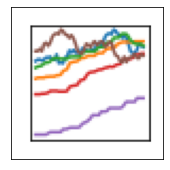

In [ ]:
# 숫자로 바뀐 이미지 중 랜덤하게 1픽하여 rn_image에 저장합니다.
rn_index = np.random.choice(train_df['label'].index)
rn_label = train_df['label'].values[rn_index]
rn_image = x_train_image[rn_index]

plt.figure()
plt.axis('off')

# 저장한 숫자 형태 이미지를 그래프화하여 보여줍니다.
plt.subplot(121)
curr_img = None
if as_gray:
    curr_img = np.reshape(rn_image, (img_rows, img_cols))
else:
    curr_img = np.reshape(rn_image, (img_rows, img_cols, in_channel))

plt.imshow(curr_img)
plt.xticks([])
plt.yticks([])

# Split train and test set
#### * train set은 전체 데이터의 80% 비율로 추출

In [ ]:
# 상승/하락으로 저장되어 있는 label을 학습을 위해 0,1의 숫자 형태로 바꾸어 줍니다
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
labels_encoded = le.fit_transform(labels)

## train : test = 8:2로 분리합니다.(stratify의 경우 label의 비율을 유지한 채로 분리하도록 도와줌)
x_train, x_test, y_train, y_test = train_test_split(x_train_image, labels_encoded, test_size = 0.2, random_state=20220504,stratify=labels)


# Training CNN Model
#### * 모델 학습을 위한 과정(CNN 모델 아키텍쳐)

In [ ]:
## cnn layer를 생성하는 과정입니다.

# models.Sequential() 을 통해 딥러닝 구조의 시작을 정의합니다.
model = models.Sequential()

# model에 convolution 2D 3 by 3, 32 채널을 추가합니다.(활성 함수는 relu이고, 초기화 기법은 he_normal을 사용하였으며 padding='same'으로 하여 입력된 이미지 사이즈와 출력된 이미지 사이즈가 동일하도록 합니다.)
model.add(layers.Conv2D(32, (3, 3), activation='relu', strides = (1,1), input_shape=(72, 72, 4),padding = 'same',kernel_initializer='he_normal'))
# model에 convolution 2D 3 by 3, 32 채널을 추가합니다.(활성 함수는 relu이고, 초기화 기법은 he_normal을 사용하였으며 padding='same'으로 하여 입력된 이미지 사이즈와 출력된 이미지 사이즈가 동일하도록 합니다.)
model.add(layers.Conv2D(32, (3, 3), activation='relu', strides = (1,1),padding = 'same',kernel_initializer='he_normal'))
# model에 maxpooling layer 2 by 2를 추가하여 이미지 사이즈를 줄입니다.
model.add(layers.MaxPooling2D((2, 2)))

# model에 convolution 2D 3 by 3, 64 채널을 추가합니다.(활성 함수는 relu이고, 초기화 기법은 he_normal을 사용하였으며 padding='same'으로 하여 입력된 이미지 사이즈와 출력된 이미지 사이즈가 동일하도록 합니다.)
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides = (1,1),padding = 'same',kernel_initializer='he_normal'))
# model에 convolution 2D 3 by 3, 64 채널을 추가합니다.(활성 함수는 relu이고, 초기화 기법은 he_normal을 사용하였으며 padding='same'으로 하여 입력된 이미지 사이즈와 출력된 이미지 사이즈가 동일하도록 합니다.)
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides = (1,1),padding = 'same',kernel_initializer='he_normal'))
# model에 maxpooling layer 2 by 2를 추가하여 이미지 사이즈를 줄입니다.
model.add(layers.MaxPooling2D((2, 2)))

# model에 convolution 2D 3 by 3, 128 채널을 추가합니다.(활성 함수는 relu이고, 초기화 기법은 he_normal을 사용하였으며 padding='same'으로 하여 입력된 이미지 사이즈와 출력된 이미지 사이즈가 동일하도록 합니다.)
model.add(layers.Conv2D(128, (3, 3), activation='relu', strides = (1,1),padding = 'same',kernel_initializer='he_normal'))
# model에 convolution 2D 3 by 3, 128 채널을 추가합니다.(활성 함수는 relu이고, 초기화 기법은 he_normal을 사용하였으며 padding='same'으로 하여 입력된 이미지 사이즈와 출력된 이미지 사이즈가 동일하도록 합니다.)
model.add(layers.Conv2D(128, (3, 3), activation='relu', strides = (1,1),padding = 'same',kernel_initializer='he_normal'))
# model에 maxpooling layer 2 by 2를 추가하여 이미지 사이즈를 줄입니다.
model.add(layers.MaxPooling2D((2, 2)))

# dense layer에 넣기 위해 flatten하게 결과값을 펼치도록 추가합니다.
model.add(layers.Flatten())
# model에 dense layer(hidden layer) 64 노드를 갖도록 추가합니다.(활성 함수는 relu입니다)
model.add(layers.Dense(64, activation='relu'))
# 상승/하락을 예측하기 위해 sigmoid로 확률값을 출력하도록 추가합니다.
model.add(layers.Dense(1, activation='sigmoid'))

# 위 모델의 전체 구조를 요약하여 보여줍니다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 72, 32)        1184      
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                    

In [ ]:
# 학습 중 최상의 모델을 저장할 경로를 지정합니다. 
best_weights_file="김준희님/kospi_bestmodel/weights.best.hdf5"

# val_loss를 기준으로 모델의 성능이 더이상 좋아지지 않는다면, 10회 이후 학습을 종료하도록 합니다.
earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=10,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )

# 학습 중 validation acc 기준으로 최상의 모델을 저장하도록 checkpoint를 설정합니다.
checkpoint = ModelCheckpoint(best_weights_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# model 학습을 위한 설정을 진행합니다.(optimizer는 adam, loss는 binary_crossentropy, 평가 metric은 accuracy 입니다.)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 학습을 진행하고 결과를 history에 저장합니다.(주입할 x, y 데이터, epochs, batch_size, 모델 저장을 위한 checkpoint 및 earlystopping 선언, validation을 위한 데이터비율, epoch마다 데이터 셔플 여부를 인수로 받음 )
history = model.fit(x_train, y_train, epochs=epochs, batch_size = batch_size,callbacks=[checkpoint, earlystopping],validation_split=0.1,shuffle=True)

Epoch 1/400
122/122 [==============================] - ETA: 0s - loss: 1.0084 - accuracy: 0.5723
Epoch 1: val_accuracy improved from -inf to 0.64037, saving model to 김준희님/kospi_bestmodel/weights.best.hdf5
122/122 [==============================] - 19s 53ms/step - loss: 1.0084 - accuracy: 0.5723 - val_loss: 0.6456 - val_accuracy: 0.6404
Epoch 2/400
121/122 [============================>.] - ETA: 0s - loss: 0.5118 - accuracy: 0.7317
Epoch 2: val_accuracy improved from 0.64037 to 0.79350, saving model to 김준희님/kospi_bestmodel/weights.best.hdf5
122/122 [==============================] - 5s 40ms/step - loss: 0.5118 - accuracy: 0.7318 - val_loss: 0.4222 - val_accuracy: 0.7935
Epoch 3/400
121/122 [============================>.] - ETA: 0s - loss: 0.3417 - accuracy: 0.8582
Epoch 3: val_accuracy improved from 0.79350 to 0.86079, saving model to 김준희님/kospi_bestmodel/weights.best.hdf5
122/122 [==============================] - 5s 40ms/step - loss: 0.3416 - accuracy: 0.8584 - val_loss: 0.2863 - val

In [ ]:
# 외부에 저장해둔 최상의 모델을 불러옴
model.load_weights(best_weights_file)

## 위에서 분리해둔 test set에 대하여 모델 정확도 반환
print('\nAccuracy: {:.4f}'.format(model.evaluate(x_test, y_test)[1])) 

# 학습 중 validation loss 저장
y_vloss = history.history['val_loss']
# 학습 중 train loss 저장
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

# train/validation 그래프 출력
plt.figure(figsize=(10,5))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss") # validation loss에 대한 그래프 출력
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss") # train loss에 대한 그래프 출력
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()